## SC1015 Mini Project (Group 5)
### Lee Yu Xuan (U2120756B)
### Ler Lian Ping (U2122530F)
### Ng Teng Hian (U2121568B)
#### Research Question: Can indicators of heart disease also indicate diabetes?

In [1]:
#Importing libraries relevant for MiniProject
import numpy as np
import pandas as pd
import seaborn as sb
import imblearn as learn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Import dataset from Kaggle: Personal Key Indicators of Heart Disease
dataset = pd.read_csv("Data.csv")
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
#To check how many diabetics patients were stated
print(dataset["Diabetic"].value_counts())

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64


In [4]:
#Removing samples from dataset for anyone who are borderline diabetics because it cannot help in getting definite answers.
dataset = dataset[dataset["Diabetic"] != "No, borderline diabetes"]

In [5]:
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [6]:
#Removing samples from dataset for any females who are pregnant because it cannot help in getting definite answers.
dataset = dataset[dataset["Diabetic"] != "Yes (during pregnancy)"]

In [7]:
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [8]:
#Create another column that translates categorical into numerical answers for "Diabetes"
dataset['Diabetes'] = np.where(dataset['Diabetic'] == "Yes" ,1,0)

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/743558325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Diabetes'] = np.where(dataset['Diabetic'] == "Yes" ,1,0)


In [9]:
#Create another column that translates categorical into numerical answers for "KidneyDisease"
dataset['KidneyDisease_Quantified'] = np.where(dataset['KidneyDisease'] == 'Yes' , 1,0)

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/3680193274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['KidneyDisease_Quantified'] = np.where(dataset['KidneyDisease'] == 'Yes' , 1,0)


In [10]:
#Create another column that translates categorical into numerical answers for "HeartDisease"
dataset['HeartDisease_Quantified'] = np.where(dataset['HeartDisease'] == 'Yes' , 1,0)

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/2982913295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['HeartDisease_Quantified'] = np.where(dataset['HeartDisease'] == 'Yes' , 1,0)


In [11]:
#Create another column that translates categorical into numerical answers for "DiffWalking"
dataset['DiffWalking_Quantified'] = np.where(dataset['DiffWalking'] == 'Yes' , 1,0)

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/407420755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DiffWalking_Quantified'] = np.where(dataset['DiffWalking'] == 'Yes' , 1,0)


In [12]:
#Create another column that translates categorical into numerical answers for "Smoking"
dataset['Smoking_Quantified'] = np.where(dataset['Smoking'] == 'Yes' , 1,0)

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/3176365882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Smoking_Quantified'] = np.where(dataset['Smoking'] == 'Yes' , 1,0)


In [13]:
#Create another column that translates categorical into numerical answers for "AlcoholDrinking"
dataset['Alcohol'] = np.where(dataset['AlcoholDrinking'] == 'Yes' , 1,0)

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/1671115615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Alcohol'] = np.where(dataset['AlcoholDrinking'] == 'Yes' , 1,0)


In [14]:
#Duplicating the dataset for AgeCategory and quantifying it
dataset['agecategory']=dataset['AgeCategory']

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/415804925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['agecategory']=dataset['AgeCategory']


In [15]:
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Diabetes,KidneyDisease_Quantified,HeartDisease_Quantified,DiffWalking_Quantified,Smoking_Quantified,Alcohol,agecategory
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,No,Yes,1,0,0,0,1,0,55-59
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,No,No,No,0,0,0,0,0,0,80 or older
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,No,No,1,0,0,0,1,0,65-69
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,No,Yes,0,0,0,0,0,0,75-79
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,No,No,No,0,0,0,1,0,0,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,Yes,No,No,1,0,1,1,1,0,60-64
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,Yes,No,No,0,0,0,0,1,0,35-39
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,No,No,No,0,0,0,0,0,0,45-49
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,No,No,No,0,0,0,0,0,0,25-29


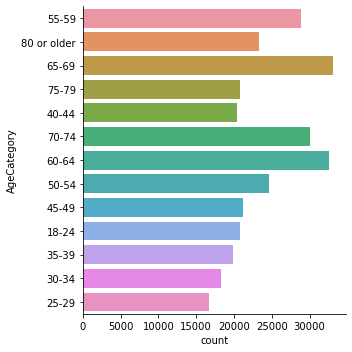

In [16]:
#To show the distribution of the AgeCategory
sb.catplot(y = 'AgeCategory', data = dataset, kind = "count")

In [17]:
#Replace each age group with corresponding numbers from 0 to 12
dataset['agecategory'].replace(['18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'],
                        [0, 1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

C:\Users\lerli\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Diabetes,KidneyDisease_Quantified,HeartDisease_Quantified,DiffWalking_Quantified,Smoking_Quantified,Alcohol,agecategory
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,No,Yes,1,0,0,0,1,0,7
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,No,No,No,0,0,0,0,0,0,12
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,No,No,1,0,0,0,1,0,9
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,No,Yes,0,0,0,0,0,0,11
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,No,No,No,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,Yes,No,No,1,0,1,1,1,0,8
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,Yes,No,No,0,0,0,0,1,0,3
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,No,No,No,0,0,0,0,0,0,5
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,No,No,No,0,0,0,0,0,0,1


In [19]:
#Indicate data type of each variable and decide on which variable to perform EDA accordingly.
print(dataset.dtypes)

HeartDisease                 object
BMI                         float64
Smoking                      object
AlcoholDrinking              object
Stroke                       object
PhysicalHealth              float64
MentalHealth                float64
DiffWalking                  object
Sex                          object
AgeCategory                  object
Race                         object
Diabetic                     object
PhysicalActivity             object
GenHealth                    object
SleepTime                   float64
Asthma                       object
KidneyDisease                object
SkinCancer                   object
Diabetes                      int32
KidneyDisease_Quantified      int32
HeartDisease_Quantified       int32
DiffWalking_Quantified        int32
Smoking_Quantified            int32
Alcohol                       int32
agecategory                   int64
dtype: object


In [20]:
#Check for NULL values in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310455 entries, 0 to 319794
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   HeartDisease              310455 non-null  object 
 1   BMI                       310455 non-null  float64
 2   Smoking                   310455 non-null  object 
 3   AlcoholDrinking           310455 non-null  object 
 4   Stroke                    310455 non-null  object 
 5   PhysicalHealth            310455 non-null  float64
 6   MentalHealth              310455 non-null  float64
 7   DiffWalking               310455 non-null  object 
 8   Sex                       310455 non-null  object 
 9   AgeCategory               310455 non-null  object 
 10  Race                      310455 non-null  object 
 11  Diabetic                  310455 non-null  object 
 12  PhysicalActivity          310455 non-null  object 
 13  GenHealth                 310455 non-null  o

In [21]:
#Define Explore1 as the dataset for variables BMI, MentalHealth, SleepTime and PhysicalHealth
Explore1 = pd.DataFrame(dataset[["BMI", "MentalHealth", "SleepTime", "PhysicalHealth"]])

In [22]:
#To display the mean, median, interquartile range, and statistics information
Explore1.describe()

,BMI,MentalHealth,SleepTime,PhysicalHealth
count,310455.000000,310455.000000,310455.000000,310455.000000
mean,28.274180,3.871630,7.100095,3.346981
std,6.328361,7.922702,1.434338,7.924002
min,12.020000,0.000000,1.000000,0.000000
25%,23.990000,0.000000,6.000000,0.000000
50%,27.280000,0.000000,7.000000,0.000000
75%,31.320000,3.000000,8.000000,2.000000
max,94.850000,30.000000,24.000000,30.000000


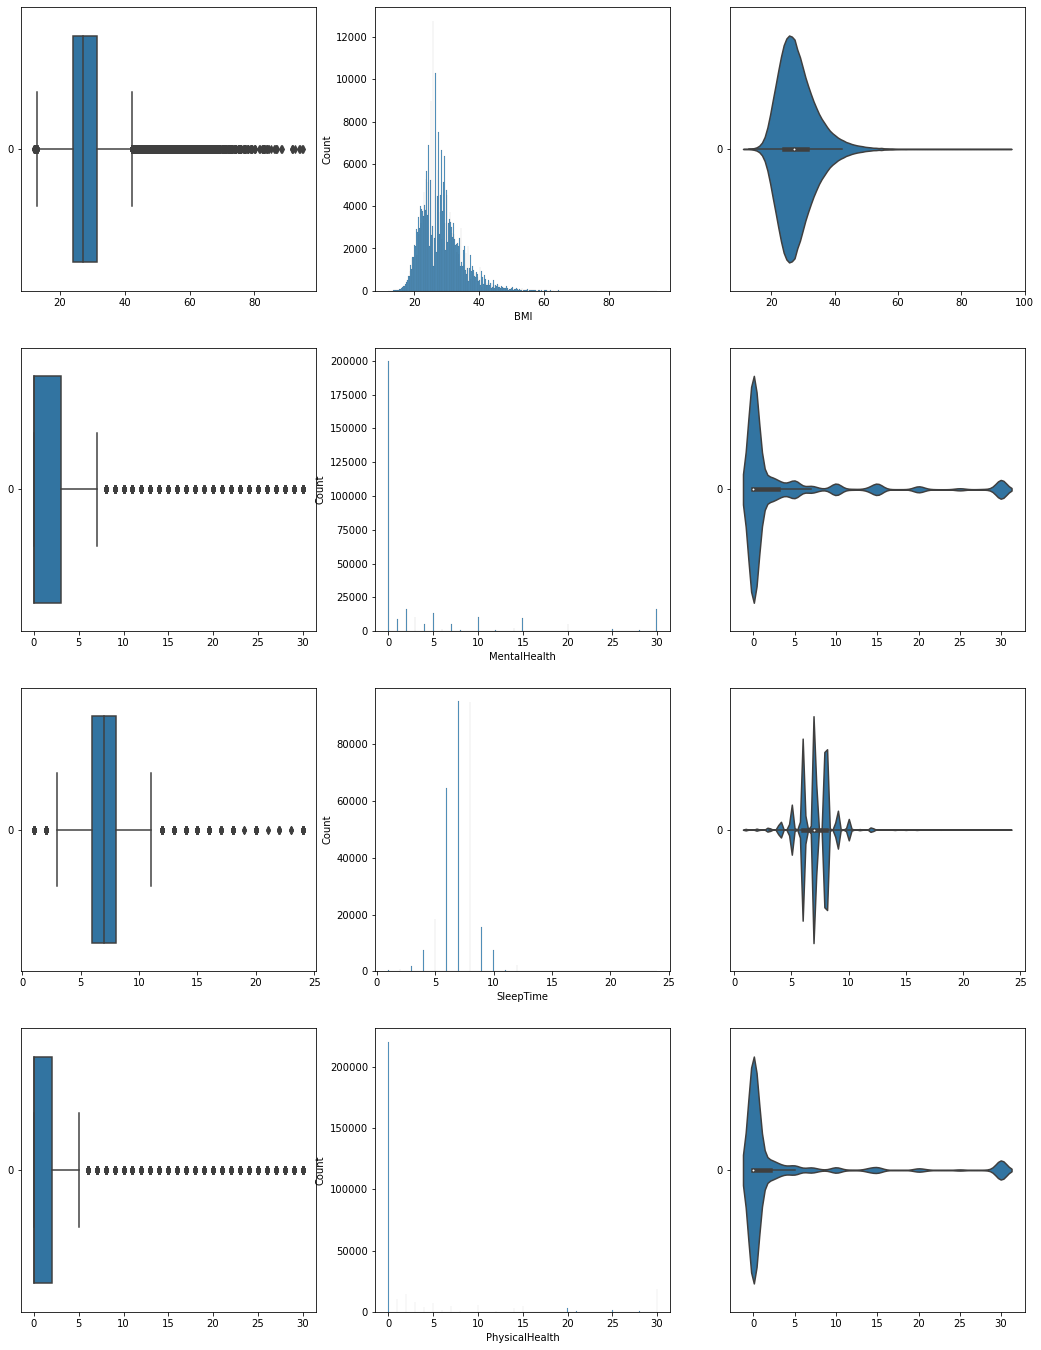

In [23]:
# Draw the distributions of variables BMI, MentalHealth, SleepTime and PhysicalHealth
f, axes = plt.subplots(4, 3, figsize=(18, 24))

count = 0
for var in Explore1:
    sb.boxplot(data = Explore1[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = Explore1[var], ax = axes[count,1])
    sb.violinplot(data = Explore1[var], orient = "h", ax = axes[count,2])
    count += 1

In [24]:
#Important libraries for Categorical Correlation
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(dataset)
categorical_features

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

C:\Users\lerli\anaconda3\lib\site-packages\dython\nominal.py:269: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(f'Rounded eta = {eta} to 1. This is probably due to floating point precision issues.',


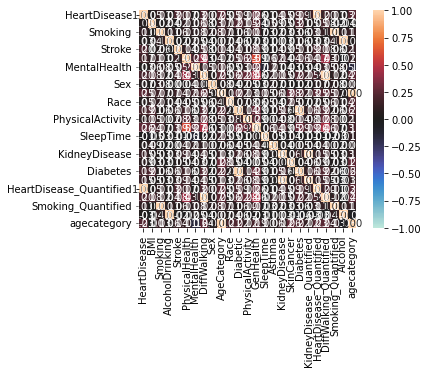

{'corr':                           HeartDisease       BMI   Smoking  AlcoholDrinking  \
 HeartDisease                  1.000000  0.052666  0.108092         0.032870   
 BMI                           0.052666  1.000000  0.022622         0.038676   
 Smoking                       0.108092  0.022622  1.000000         0.111826   
 AlcoholDrinking               0.032870  0.038676  0.111826         1.000000   
 Stroke                        0.197974  0.020494  0.061567         0.020056   
 PhysicalHealth                0.171680  0.108018  0.114551         0.017788   
 MentalHealth                  0.028235  0.061936  0.084305         0.051640   
 DiffWalking                   0.202897  0.180444  0.120398         0.035269   
 Sex                           0.068654  0.029180  0.084418         0.002379   
 AgeCategory                   0.246706  0.170792  0.165325         0.069728   
 Race                          0.050579  0.116979  0.107433         0.040140   
 Diabetic                      0

In [25]:
#Run associations function with dataset as the parameter
associations(dataset, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

C:\Users\lerli\anaconda3\lib\site-packages\dython\nominal.py:269: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(f'Rounded eta = {eta} to 1. This is probably due to floating point precision issues.',


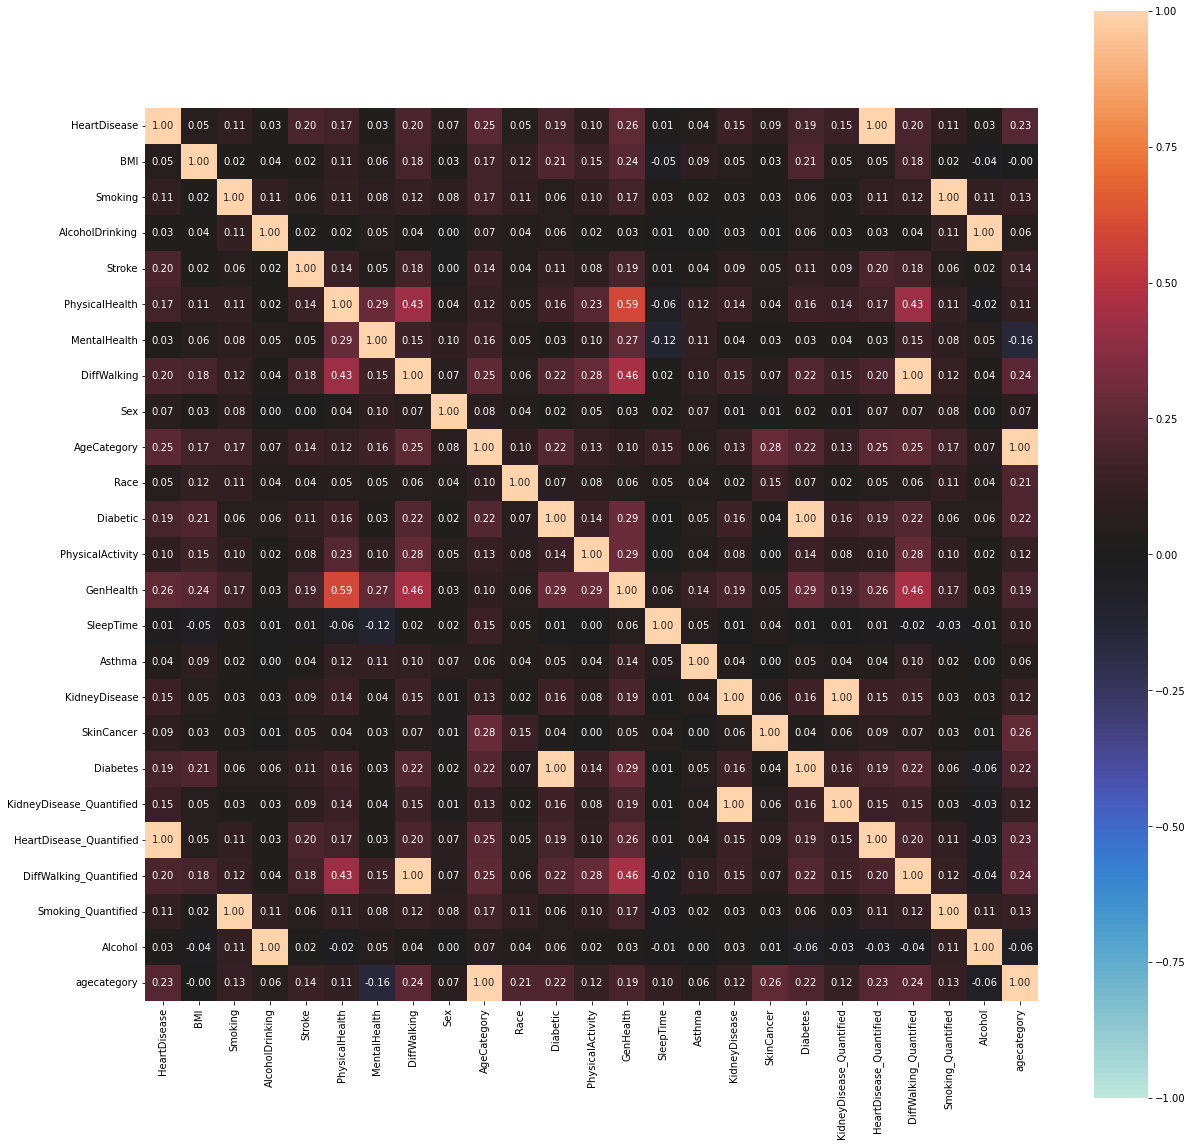

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/2597218153.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Diabetes,KidneyDisease_Quantified,HeartDisease_Quantified,DiffWalking_Quantified,Smoking_Quantified,Alcohol,agecategory
HeartDisease,1.00,0.05,0.11,0.03,0.20,0.17,0.03,0.20,0.07,0.25,0.05,0.19,0.10,0.26,0.01,0.04,0.15,0.09,0.19,0.15,1.00,0.20,0.11,0.03,0.23
BMI,0.05,1.00,0.02,0.04,0.02,0.11,0.06,0.18,0.03,0.17,0.12,0.21,0.15,0.24,-0.05,0.09,0.05,0.03,0.21,0.05,0.05,0.18,0.02,-0.04,-0.00
Smoking,0.11,0.02,1.00,0.11,0.06,0.11,0.08,0.12,0.08,0.17,0.11,0.06,0.10,0.17,0.03,0.02,0.03,0.03,0.06,0.03,0.11,0.12,1.00,0.11,0.13
AlcoholDrinking,0.03,0.04,0.11,1.00,0.02,0.02,0.05,0.04,0.00,0.07,0.04,0.06,0.02,0.03,0.01,0.00,0.03,0.01,0.06,0.03,0.03,0.04,0.11,1.00,0.06
Stroke,0.20,0.02,0.06,0.02,1.00,0.14,0.05,0.18,0.00,0.14,0.04,0.11,0.08,0.19,0.01,0.04,0.09,0.05,0.11,0.09,0.20,0.18,0.06,0.02,0.14
PhysicalHealth,0.17,0.11,0.11,0.02,0.14,1.00,0.29,0.43,0.04,0.12,0.05,0.16,0.23,0.59,-0.06,0.12,0.14,0.04,0.16,0.14,0.17,0.43,0.11,-0.02,0.11
MentalHealth,0.03,0.06,0.08,0.05,0.05,0.29,1.00,0.15,0.10,0.16,0.05,0.03,0.10,0.27,-0.12,0.11,0.04,0.03,0.03,0.04,0.03,0.15,0.08,0.05,-0.16
DiffWalking,0.20,0.18,0.12,0.04,0.18,0.43,0.15,1.00,0.07,0.25,0.06,0.22,0.28,0.46,0.02,0.10,0.15,0.07,0.22,0.15,0.20,1.00,0.12,0.04,0.24
Sex,0.07,0.03,0.08,0.00,0.00,0.04,0.10,0.07,1.00,0.08,0.04,0.02,0.05,0.03,0.02,0.07,0.01,0.01,0.02,0.01,0.07,0.07,0.08,0.00,0.07
AgeCategory,0.25,0.17,0.17,0.07,0.14,0.12,0.16,0.25,0.08,1.00,0.10,0.22,0.13,0.10,0.15,0.06,0.13,0.28,0.22,0.13,0.25,0.25,0.17,0.07,1.00


In [26]:
#Extract the correlation matrix by using the following code
complete_correlation = associations(dataset, filename = 'complete_correlation.jpeg', figsize = (20,20))
df_complete_corr = complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [27]:
#Define quartile range to remove outliers
Q1 = dataset['BMI'].quantile(0.25)
Q3 = dataset['BMI'].quantile(0.75)  

#Declaring dataset_filtered as the dataset with outliers removed.
dataset_filtered = dataset[(dataset['BMI'] <=Q3 ) & (dataset['BMI'] >=Q1)]

In [28]:
dataset_filtered

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Diabetes,KidneyDisease_Quantified,HeartDisease_Quantified,DiffWalking_Quantified,Smoking_Quantified,Alcohol,agecategory
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,No,No,1,0,0,0,1,0,9
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,No,Yes,0,0,0,0,0,0,11
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,...,No,No,No,0,0,1,1,1,0,11
11,No,28.71,Yes,No,No,0.0,0.0,No,Female,55-59,...,No,No,No,0,0,0,0,1,0,7
12,No,28.37,Yes,No,No,0.0,0.0,Yes,Male,75-79,...,No,No,No,1,0,0,1,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319780,No,30.67,No,No,No,0.0,8.0,No,Female,25-29,...,No,No,No,0,0,0,0,0,0,1
319784,No,26.58,Yes,No,No,0.0,0.0,Yes,Male,75-79,...,No,No,No,0,0,0,1,1,0,11
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,Yes,No,No,1,0,1,1,1,0,8
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,Yes,No,No,0,0,0,0,1,0,3


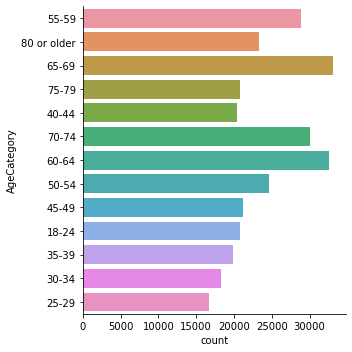

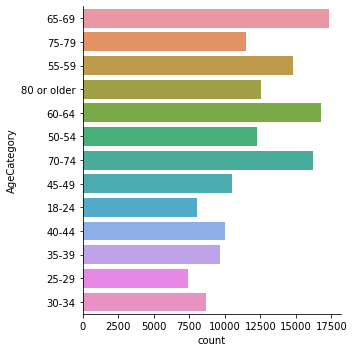

In [29]:
#To show the distribution across AgeCategory is evenly spread out

#The first bargraph is to depict the distribution with outliers
sb.catplot(y = 'AgeCategory', data = dataset, kind = "count")

#The second bargraph is to depict the distribution after outliers are removed
sb.catplot(y = 'AgeCategory', data = dataset_filtered, kind = "count")

<AxesSubplot:xlabel='BMI', ylabel='Diabetic'>

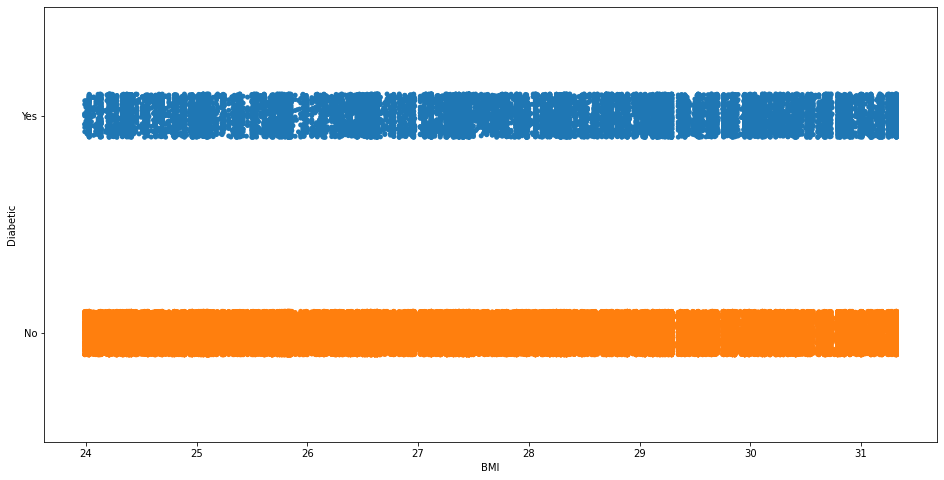

In [30]:
#Plotting Diabetes against BMI
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'BMI', y = 'Diabetic', data = dataset_filtered)

<AxesSubplot:ylabel='Diabetes'>

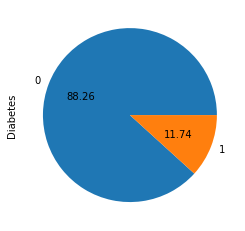

In [31]:
dataset_filtered['Diabetes'].value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='Diabetes'>

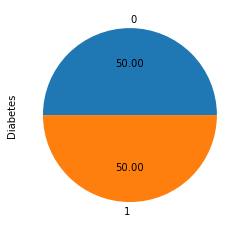

In [32]:
#Importing libraries for Under-Sampling so the data ratio is balanced and it is unbiased.
from imblearn.under_sampling import RandomUnderSampler

predictors = ["BMI","HeartDisease_Quantified","KidneyDisease_Quantified","agecategory","DiffWalking_Quantified"]
X = pd.DataFrame(dataset_filtered[predictors]) 
y=dataset_filtered["Diabetes"]

rus=RandomUnderSampler(sampling_strategy=1)   #Sampling Startegy means the ratio
x_res,y_res = rus.fit_resample(X,y)
y_res.value_counts().plot.pie(autopct='%.2f')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6764152556866769

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6775208646873717

True Positive Rate For Train Data: 0.7314884581135694
False Positive Rate For Train Data: 0.3785187209620115

True Positive Rate For Test Data: 0.7378164987748435
False Positive Rate For Test Data: 0.3833883388338834


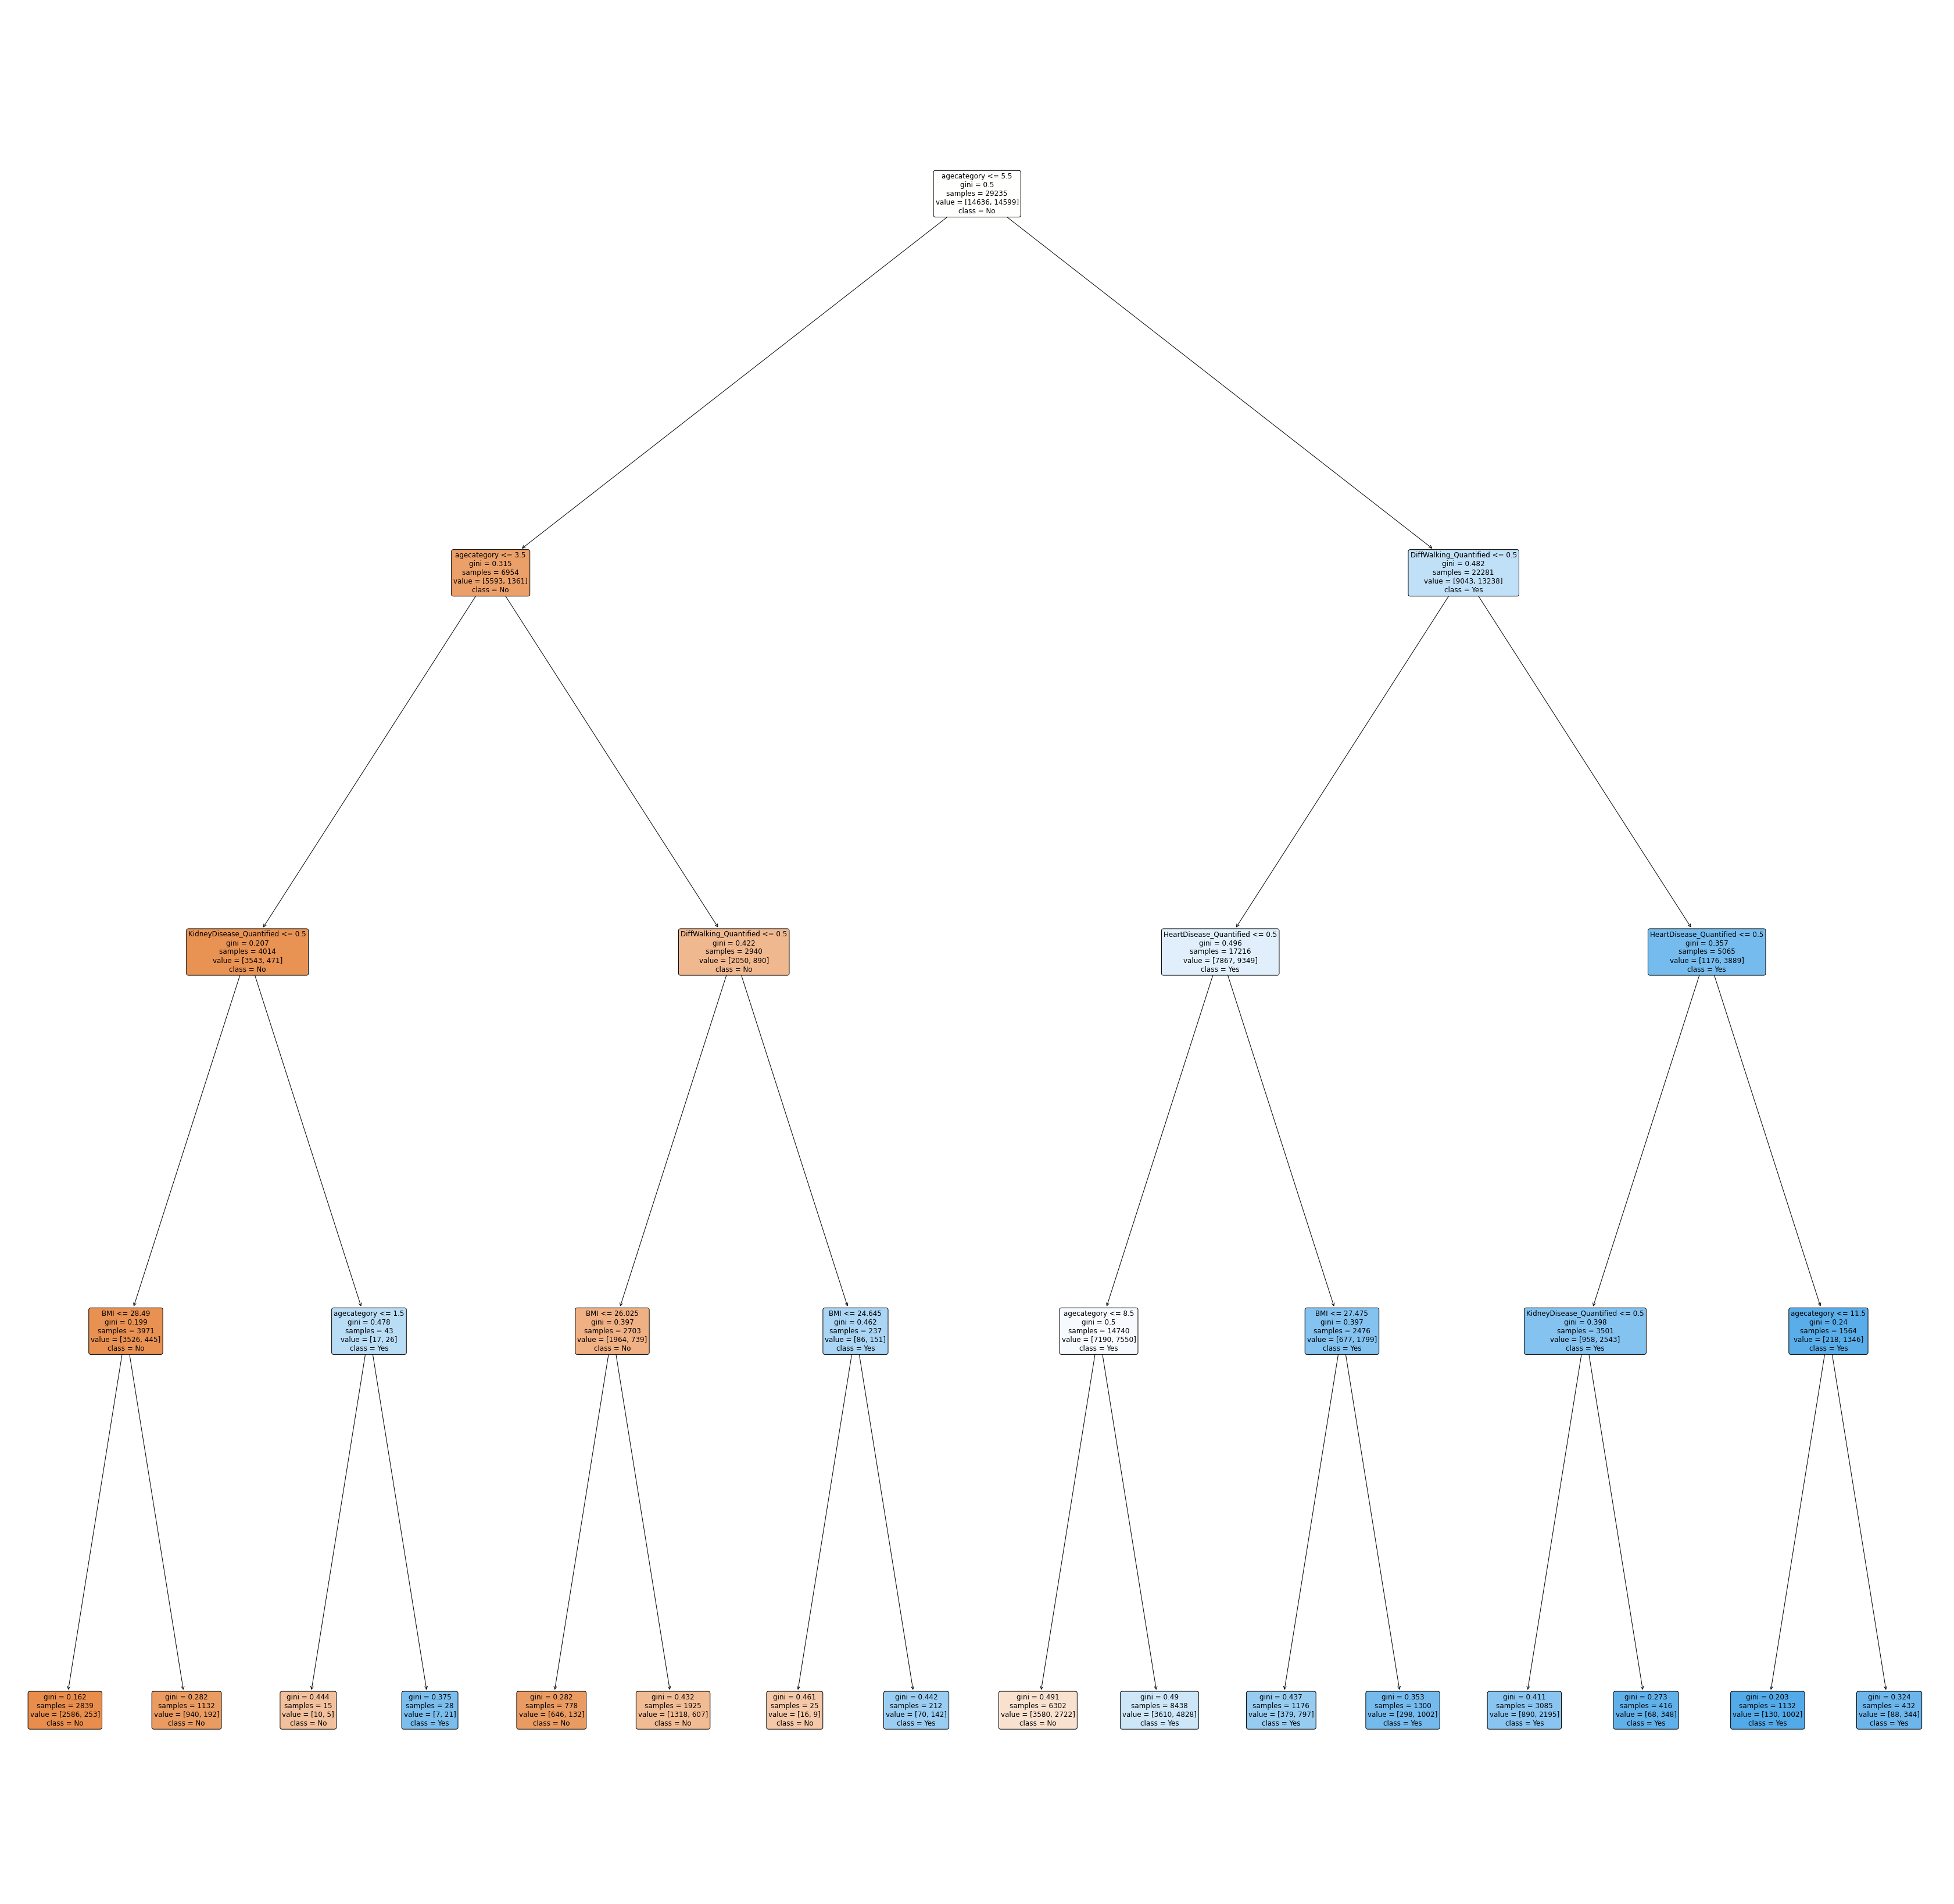

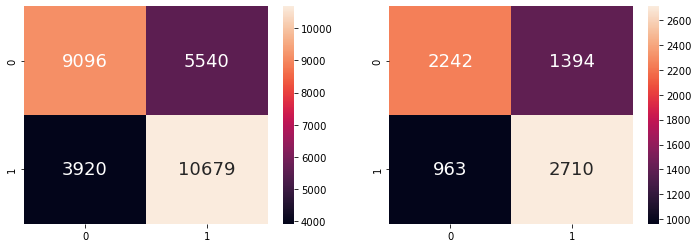

In [33]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Diabetes-Independent Variables Dataset
Diabetes = y_res                                                # Response
X = x_res                                                       # Predictor

# Split the Diabetes-Independent Variables Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Diabetes, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)                 # create the decision tree object
dectree.fit(X_train, y_train)                                   # train the decision tree model

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(60,60))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

tn, fp , fn , tp = confusion_matrix(y_train,y_train_pred).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)

print("True Positive Rate For Train Data:" , tpr)
print("False Positive Rate For Train Data:" , fpr)
print("")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

tn, fp , fn , tp = confusion_matrix(y_test,y_test_pred).ravel()
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)

print("True Positive Rate For Test Data:" , tpr)
print("False Positive Rate For Test Data:" , fpr)

In [57]:
#Importing libraries required for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [58]:
#Making a new dataset with only Diabetes column
diabetesDF = pd.DataFrame(dataset[["Diabetes"]])

In [59]:
diabetesDF

,Diabetes
0,1
1,0
2,1
3,0
4,0
...,...
319790,1
319791,0
319792,0
319793,0


In [60]:
#Making another new dataset for independent variables, dropping irrelevant columns where applicable
independent_variable = dataset.drop(["Diabetes", "HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth", "MentalHealth", "DiffWalking", "Sex","AgeCategory", "SleepTime", "Asthma", "KidneyDisease", "Race", "Diabetic", "PhysicalActivity", "SkinCancer", "GenHealth"], axis=1)

In [61]:
independent_variable

,BMI,KidneyDisease_Quantified,HeartDisease_Quantified,DiffWalking_Quantified,Smoking_Quantified,Alcohol,agecategory
0,16.60,0,0,0,1,0,7
1,20.34,0,0,0,0,0,12
2,26.58,0,0,0,1,0,9
3,24.21,0,0,0,0,0,11
4,23.71,0,0,1,0,0,4
...,...,...,...,...,...,...,...
319790,27.41,0,1,1,1,0,8
319791,29.84,0,0,0,1,0,3
319792,24.24,0,0,0,0,0,5
319793,32.81,0,0,0,0,0,1


In [62]:
A_train, A_test, B_train, B_test = train_test_split(independent_variable, diabetesDF, test_size=0.2, random_state=20)

In [63]:
model = RandomForestClassifier(n_estimators = 10, random_state = 30)

In [64]:
model.fit(A_train, B_train)

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/645041576.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(A_train, B_train)


RandomForestClassifier(n_estimators=10, random_state=30)

In [65]:
prediction_test = model.predict(A_test)

In [66]:
print("Accuracy = ", metrics.accuracy_score(B_test, prediction_test))

Accuracy =  0.8473208677586124


In [67]:
feature_list = list(A_train.columns)
feature_imp = pd.Series(model.feature_importances_, index = feature_list).sort_values(ascending = False)
print(feature_imp)

BMI                         0.754509
agecategory                 0.108113
DiffWalking_Quantified      0.059584
HeartDisease_Quantified     0.039513
KidneyDisease_Quantified    0.024846
Alcohol                     0.006893
Smoking_Quantified          0.006542
dtype: float64


In [68]:
feature_list2 = list(A_test.columns)
feature_imp2 = pd.Series(model.feature_importances_, index = feature_list2).sort_values(ascending = False)
print(feature_imp2)

BMI                         0.754509
agecategory                 0.108113
DiffWalking_Quantified      0.059584
HeartDisease_Quantified     0.039513
KidneyDisease_Quantified    0.024846
Alcohol                     0.006893
Smoking_Quantified          0.006542
dtype: float64


In [69]:
#Making a new dataset with only Diabetes column
diabetesDF2 = pd.DataFrame(dataset_filtered[["Diabetes"]])

In [70]:
diabetesDF2

,Diabetes
2,1
3,0
5,0
11,0
12,1
...,...
319780,0
319784,0
319790,1
319791,0


In [71]:
#Making another new dataset for independent variables, dropping irrelevant columns where applicable
independent_variable2 = dataset_filtered.drop(["Diabetes", "HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth", "MentalHealth", "DiffWalking", "Sex","AgeCategory", "SleepTime", "Asthma", "KidneyDisease", "Race", "Diabetic", "PhysicalActivity", "SkinCancer", "GenHealth"], axis=1)

In [72]:
independent_variable2

,BMI,KidneyDisease_Quantified,HeartDisease_Quantified,DiffWalking_Quantified,Smoking_Quantified,Alcohol,agecategory
2,26.58,0,0,0,1,0,9
3,24.21,0,0,0,0,0,11
5,28.87,0,1,1,1,0,11
11,28.71,0,0,0,1,0,7
12,28.37,0,0,1,1,0,11
...,...,...,...,...,...,...,...
319780,30.67,0,0,0,0,0,1
319784,26.58,0,0,1,1,0,11
319790,27.41,0,1,1,1,0,8
319791,29.84,0,0,0,1,0,3


In [73]:
A_train, A_test, B_train, B_test = train_test_split(independent_variable2, diabetesDF2, test_size=0.2, random_state=20)

In [74]:
model = RandomForestClassifier(n_estimators = 10, random_state = 30)

In [75]:
model.fit(A_train, B_train)

C:\Users\lerli\AppData\Local\Temp/ipykernel_3256/645041576.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(A_train, B_train)


RandomForestClassifier(n_estimators=10, random_state=30)

In [76]:
prediction_test = model.predict(A_test)

In [77]:
print("Accuracy = ", metrics.accuracy_score(B_test, prediction_test))

Accuracy =  0.8638481061457898


In [78]:
feature_list = list(A_train.columns)
feature_imp = pd.Series(model.feature_importances_, index = feature_list).sort_values(ascending = False)
print(feature_imp)

BMI                         0.703346
agecategory                 0.146560
DiffWalking_Quantified      0.053572
HeartDisease_Quantified     0.045296
KidneyDisease_Quantified    0.032452
Smoking_Quantified          0.010460
Alcohol                     0.008315
dtype: float64


In [79]:
feature_list2 = list(A_test.columns)
feature_imp2 = pd.Series(model.feature_importances_, index = feature_list2).sort_values(ascending = False)
print(feature_imp2)

BMI                         0.703346
agecategory                 0.146560
DiffWalking_Quantified      0.053572
HeartDisease_Quantified     0.045296
KidneyDisease_Quantified    0.032452
Smoking_Quantified          0.010460
Alcohol                     0.008315
dtype: float64
